In [2]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

Text(0, 0.5, '0')

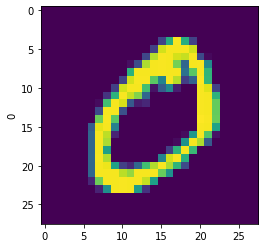

In [6]:
plt.imshow(X_train[1])
plt.ylabel(y_train[1])

Text(0, 0.5, '2')

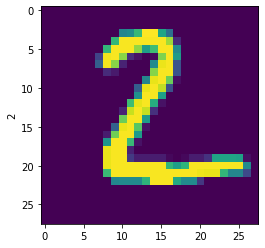

In [7]:
plt.imshow(X_test[1])
plt.ylabel(y_test[1])

In [8]:
no_of_images,l,w=X_train.shape

In [9]:
X_train_reshaped=X_train.reshape(len(X_train),l*w)
X_train_reshaped=X_train_reshaped/255 


In [10]:
X_train_reshaped.shape

(60000, 784)

In [11]:
X_test_reshaped=X_test.reshape(len(X_test),l*w)
X_test_reshaped=X_test_reshaped/255 


In [12]:
X_test_reshaped.shape

(10000, 784)

In [13]:
model=keras.Sequential(
    [
     keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
    ]
)

In [14]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [15]:
model.fit(x=X_train_reshaped,y=y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4637 - accuracy: 0.8800
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3028 - accuracy: 0.9161
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2669 - accuracy: 0.9255


In [16]:
model.evaluate(X_test_reshaped,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2675 - accuracy: 0.9252


[0.26750215888023376, 0.9251999855041504]

In [23]:
y_pred=model.predict(X_test_reshaped)

Text(0.5, 0, '0')

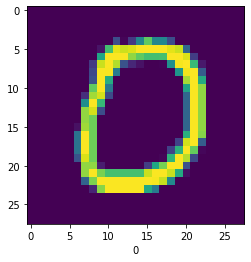

In [27]:
import numpy as np
plt.imshow(X_test[10])
plt.xlabel(np.argmax(y_pred[10]))

In [28]:
y_predicted=[np.argmax(i) for i in y_pred]

In [29]:
tensorflow.math.confusion_matrix(labels=y_test,predictions=y_predicted)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    1,    2,    0,    5,    8,    3,    2,    1],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   7,   11,  914,   18,    9,    4,   13,   11,   40,    5],
       [   1,    1,   18,  931,    2,   18,    3,   10,   18,    8],
       [   1,    2,    3,    1,  925,    0,   11,    4,    6,   29],
       [   7,    3,    2,   40,   11,  770,   15,    8,   29,    7],
       [  10,    3,    5,    1,    8,   14,  913,    2,    2,    0],
       [   1,    7,   21,    7,    8,    0,    0,  948,    2,   34],
       [   5,   12,    5,   22,   10,   25,    9,   12,  861,   13],
       [  11,    7,    1,   10,   35,    7,    0,   20,    3,  915]],
      dtype=int32)>

In [31]:
model_2=keras.Sequential([
     keras.layers.Dense(100,input_shape=(784,),activation="relu"),
     keras.layers.Dense(10,activation="sigmoid")
     ])
model_2.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model_2.fit(X_train_reshaped,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2730 - accuracy: 0.9222
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1217 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0847 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0654 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0508 - accuracy: 0.9844


In [32]:
model_2.evaluate(X_test_reshaped,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0800 - accuracy: 0.9750


[0.08003824204206467, 0.9750000238418579]

In [33]:
y_pred2=model.predict(X_test_reshaped)

In [34]:
y_predicted2=[np.argmax(i) for i in y_pred2]

In [35]:
tensorflow.math.confusion_matrix(labels=y_test,predictions=y_predicted2)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    1,    2,    0,    5,    8,    3,    2,    1],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   7,   11,  914,   18,    9,    4,   13,   11,   40,    5],
       [   1,    1,   18,  931,    2,   18,    3,   10,   18,    8],
       [   1,    2,    3,    1,  925,    0,   11,    4,    6,   29],
       [   7,    3,    2,   40,   11,  770,   15,    8,   29,    7],
       [  10,    3,    5,    1,    8,   14,  913,    2,    2,    0],
       [   1,    7,   21,    7,    8,    0,    0,  948,    2,   34],
       [   5,   12,    5,   22,   10,   25,    9,   12,  861,   13],
       [  11,    7,    1,   10,   35,    7,    0,   20,    3,  915]],
      dtype=int32)>

In [36]:
X_train=X_train/255
X_test=X_test/255

In [37]:
model_3=keras.Sequential([
     keras.layers.Flatten(input_shape=(28,28)),                     
     keras.layers.Dense(100,activation="relu"),
     keras.layers.Dense(10,activation="sigmoid")
     ])
model_3.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model_3.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2727 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1248 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0862 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0655 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0506 - accuracy: 0.9845
